<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/27_Mask_r_cnn_%EA%B0%84%EB%8B%A8%ED%9E%88_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

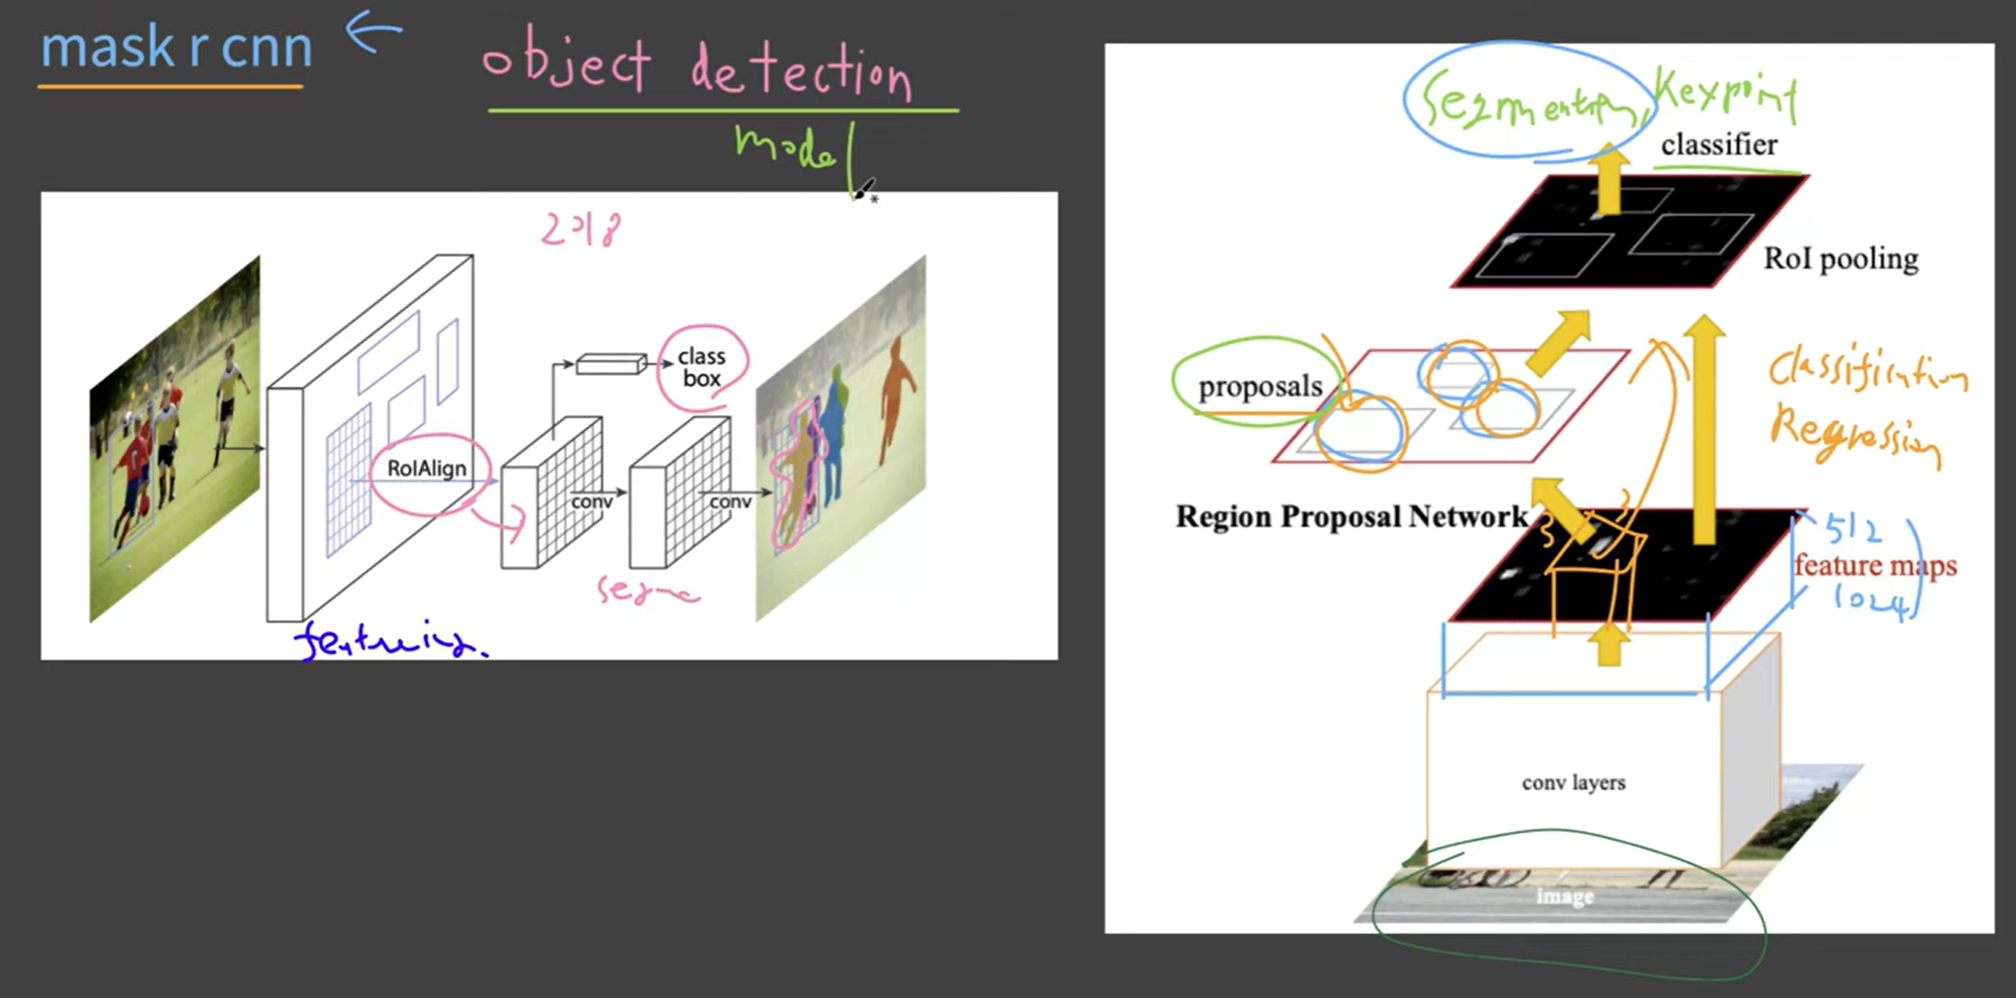

# Faster R-CNN 계열 & Mask R-CNN 개요 정리

이번 시간에는 잠깐 쉬어가는 느낌으로  
Faster R-CNN 시리즈 중 **Mask R-CNN**을 중심으로  
고전적인 Object Detection 모델들의 변형(variation)을 간단히 정리한다.

> 목적  
> - 최신 모델을 깊게 파기보다는  
> - **Faster R-CNN 계열의 확장 구조가 어떻게 발전했는지** 감 잡기

---

## 1. Faster R-CNN 계열 복습

### 1.1 Fast R-CNN의 핵심 아이디어

**:contentReference[oaicite:0]{index=0}**은  
Object Detection에서 **속도 문제**를 크게 개선한 모델이다.

#### 기존 방식의 문제점
- 객체가 있을 것 같은 영역(region)을 먼저 자름
- 각 region마다 CNN을 **개별적으로 실행**
- → 연산량이 너무 커서 매우 느림

#### Fast R-CNN의 해결 방법
1. **입력 이미지 전체**에 CNN을 한 번만 적용
2. Feature Map을 한 번에 생성
3. Feature Map 위에서 Region 단위로 처리

즉,
> CNN 연산을 region마다 하지 않고 **공유(shared)** 한다.

---

### 1.2 Feature Map & Region Proposal

- Backbone CNN (예: ResNet, MobileNet 등)
- 출력 Feature Map은:
  - 공간 정보 유지
  - 채널 수는 보통 **512 / 1024 이상**

이 Feature Map 위에  
**Region Proposal Network (RPN)** 를 적용한다.

#### RPN 동작 방식
- 3×3 Conv 커널을 sliding window처럼 이동
- 각 위치마다:
  - 객체가 있을 확률(objectness)
  - Bounding Box 보정값(regression) 예측

---

### 1.3 ROI Pooling

RPN에서 positive로 판단된 region에 대해:

- Feature Map을 region 크기에 맞게 잘라냄
- **ROI Pooling** 적용
- 고정 크기 Feature로 변환

이후:
- Classification Head
- Bounding Box Regression Head  
를 통해 최종 Detection 결과를 출력

---

## 2. Mask R-CNN

### 2.1 Mask R-CNN 개요

**:contentReference[oaicite:1]{index=1}**은  
Faster R-CNN 구조에 **Segmentation Branch**를 추가한 모델이다.

> Detection + Instance Segmentation을 동시에 수행

---

### 2.2 ROI Align

Mask R-CNN의 핵심 차이점은 **ROI Align**이다.

#### ROI Pooling의 문제
- 좌표를 정수로 양자화(quantization)
- → 미세한 위치 정보 손실

#### ROI Align의 개선
- 좌표를 실수 단위로 유지
- Bilinear interpolation 사용
- Segmentation 성능 대폭 향상

---

### 2.3 전체 구조 요약

1. Input Image
2. Backbone CNN → Feature Map
3. Region Proposal Network
4. ROI Align
5. Head 분기
   - Classification Head
   - Bounding Box Regression Head
   - **Mask Segmentation Head**

---

## 3. PyTorch Pretrained Mask R-CNN 사용 예

PyTorch 공식 모델에서는  
**:contentReference[oaicite:2]{index=2}** 기반  
Mask R-CNN pretrained 모델을 제공한다.

### 특징
- Backbone: **:contentReference[oaicite:3]{index=3}**
- COCO Dataset으로 사전 학습

### 출력 결과
Model output dictionary에는 다음 정보가 포함된다:

- `boxes` : Bounding Boxes
- `labels` : Class Labels
- `scores` : Confidence Scores
- `masks` : Instance Segmentation Masks

보통 score가 **0.9 이상**인 결과만 시각화한다.

---

## 4. Keypoint R-CNN

Mask R-CNN과 같은 논문에서 함께 제안된 모델

### 특징
- Region 기반 구조
- 사람의 관절(Keypoint) 위치 예측
- Skeleton 기반 Pose Estimation 수행

> 구조적으로 Mask R-CNN과 매우 유사  
> → Head만 Keypoint 예측용으로 변경

---

## 5. 실무 관점 정리

- Object Detection은 구조가 매우 복잡
- 대부분의 경우:
  - 모델을 직접 구현 ❌
  - **Pretrained 모델을 Fine-tuning** ⭕

---

## 6. 실무에서 많이 쓰는 오픈소스

- **:contentReference[oaicite:4]{index=4}**
- **:contentReference[oaicite:5]{index=5}**

### 장점
- 최신 논문 모델 빠르게 반영
- 설정(config) 기반 실험 가능
- 커뮤니티 & 문서 풍부

---

## 마무리

- Faster R-CNN 계열은 **고전 Object Detection의 핵심**
- Mask R-CNN은:
  - Detection
  - Segmentation
  - Keypoint Detection  
  의 기반 구조를 제공

다음 챕터부터는  
👉 **Image Segmentation**을 더 깊게 다룰 예정이다.


In [3]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

fatal: destination path 'deepLearning' already exists and is not an empty directory.


In [4]:
img_path = './deepLearning/detectSegment/dog_cat.png'

In [5]:
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights
from torchvision.transforms.functional import to_pil_image

img = read_image(img_path)

weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = maskrcnn_resnet50_fpn_v2(weights=weights, progress=True)
model.eval()

preprocess = weights.transforms()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth


100%|██████████| 177M/177M [00:01<00:00, 133MB/s]


In [6]:
batch = preprocess(img).unsqueeze(0)
prediction = model(batch)[0]
"""
preprocess (weights.transforms())가 수행하는 것:

uint8 → float32

0~255 → 0~1

mean / std 정규화

필요한 resize
"""
"""
.unsqueeze(0)
.unsqueeze(0)


차원 하나를 앞에 추가

이유: Batch 차원 만들기

변화:

(3, H', W') → (1, 3, H', W')
"""

In [9]:
print(prediction.keys())
"""
dict_keys(['boxes', 'labels', 'scores', 'masks']) 요약

이건 **Mask R-CNN**이
한 이미지에서 검출한 객체들의 예측 결과 묶음이다.

boxes
→ 객체 위치 (Bounding Box 좌표)

labels
→ 객체의 클래스 ID (사람, 고양이, 강아지 등)

scores
→ 예측 신뢰도 (0~1)

masks
→ 객체별 픽셀 단위 분할 결과 (Instance Segmentation)
"""

dict_keys(['boxes', 'labels', 'scores', 'masks'])


"\ndict_keys(['boxes', 'labels', 'scores', 'masks']) 요약\n\n이건 **Mask R-CNN**이\n한 이미지에서 검출한 객체들의 예측 결과 묶음이다.\n\nboxes\n→ 객체 위치 (Bounding Box 좌표)\n\nlabels\n→ 객체의 클래스 ID (사람, 고양이, 강아지 등)\n\nscores\n→ 예측 신뢰도 (0~1)\n\nmasks\n→ 객체별 픽셀 단위 분할 결과 (Instance Segmentation)\n"

In [19]:
print(prediction['scores'].shape[0])
print(prediction['scores'])

16
tensor([0.9951, 0.9898, 0.9807, 0.9708, 0.9505, 0.6438, 0.5536, 0.3908, 0.1862,
        0.1237, 0.1124, 0.1047, 0.1008, 0.1004, 0.0990, 0.0529],
       grad_fn=<IndexBackward0>)


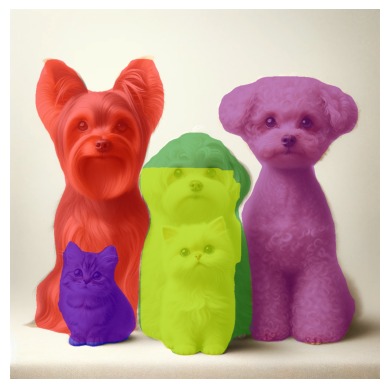

In [20]:
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

result_img = img.clone()
for idx in range(prediction['scores'].shape[0]):
  score = prediction['scores'][idx]
  if score < 0.9:
    break
  color = colors[idx % len(colors)]
  mask = 0.5 < prediction['masks'][idx]
  result_img = draw_segmentation_masks(result_img, mask, alpha=0.5, colors=color)

plt.imshow(to_pil_image(result_img))
plt.axis('off')
plt.show()
"""
score
 → 객체 전체가 진짜일 확률

prediction['masks'][idx]
 → 객체 내부 픽셀별 "소속 확률 지도"

mask
 → 그 확률 지도를 기준값(0.5)으로 잘라 만든 최종 객체 영역
"""


| 구분       | score               | masks          |
| -------- | ------------------- | -------------- |
| 예측 단위    | 객체 전체               | 픽셀 단위          |
| 나오는 head | Classification head | Mask head      |
| 값 개수     | 객체당 1개              | 객체당 H×W        |
| 값 의미     | “이 객체가 맞을 확률”       | “이 픽셀이 객체일 확률” |
